![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 24 - Introduction to NLP </center>
### <center> Bag of Words \& TF-IDF </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/24_NLP/MainBoW.ipynb)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

### Basic BoW example:
We first create some documents

In [2]:
lDocs  = []
lDocs += ['This is the first sentence']
lDocs += ['This is the second']
lDocs += ['This that']
lDocs += ['Short short sentence']
lDocs

['This is the first sentence',
 'This is the second',
 'This that',
 'Short short sentence']

### BoW and TF-IDF:
We create BoW using `CountVectorizer`.

Note that `CountVectorizer` returns a sparse matrix

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

oBoW = CountVectorizer().fit(lDocs)
mBoW = oBoW.transform(lDocs)

print('BoW of words:')
print(mBoW.todense())
print('\n------------------------')
print('Vocabulary:')
sorted(oBoW.vocabulary_.items(), key=lambda item: item[1])

BoW of words:
[[1 1 0 1 0 0 1 1]
 [0 1 1 0 0 0 1 1]
 [0 0 0 0 0 1 0 1]
 [0 0 0 1 2 0 0 0]]

------------------------
Vocabulary:


[('first', 0),
 ('is', 1),
 ('second', 2),
 ('sentence', 3),
 ('short', 4),
 ('that', 5),
 ('the', 6),
 ('this', 7)]

#### Sparse representation:

In [4]:
mBoW

<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

#### TF-IDF:

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=3)

TfidfTransformer().fit_transform(mBoW).todense()

matrix([[0.553, 0.436, 0.   , 0.436, 0.   , 0.   , 0.436, 0.353],
        [0.   , 0.484, 0.614, 0.   , 0.   , 0.   , 0.484, 0.392],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.843, 0.   , 0.538],
        [0.   , 0.   , 0.   , 0.367, 0.93 , 0.   , 0.   , 0.   ]])

### Load IMDB Sentiment Analysis:
https://www.kaggle.com/kaushik3497/imdb-sentiment-analysis

In [6]:
N     = 5000
dData = pd.read_csv('labeledTrainData.tsv', delimiter='\t')
dData = dData[:N]
dData

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
4995,3720_2,0,Is this film a joke? Is it a comedy? Surely it...
4996,4229_10,1,Don't waste time reading my review. Go out and...
4997,8042_3,0,"The secret is...this movie blows. Sorry, but i..."
4998,9669_9,1,After reading the original play I thought it w...


#### Display a full review:

In [7]:
red   = '\x1b[31m'
green = '\x1b[32m'
bold  = '\x1b[1m'
end   = '\x1b[0m'

lIdx = [9, 212]

for idx in lIdx:
    y     = dData['sentiment'][idx]
    color = green if y == 1 else red
    
    print('=' * 120)
    print(bold  + f'ID = {dData["id"][idx]}:' + end)
    print(color + dData['review'][idx]        + end)
    print('=' * 120)

ID = 8713_10:
<br /><br />This movie is full of references. Like \Mad Max II\", \"The wild one\" and many others. The ladybug´s face it´s a clear reference (or tribute) to Peter Lorre. This movie is a masterpiece. We´ll talk much more about in the future."
ID = 1816_1:
This movie is truly brilliant. It ducks through banality to crap at such speed you don't even see good sense and common decency to mankind go whizzing past. But it doesn't stop there! This movie hits the bottom of the barrel so hard it bounces back to the point of ludicrous comedy: behold as Kor the Beergutted Conan wannabe with the over-abundance of neck hair struts his stuff swinging his sword like there's no tomorrow (and the way he swung it, I really am amazed there *was* a tomorrow for him, or at least, for his beer gut). Don't miss this movie, it's a fantastic romp through idiocy, and sheer bloody mindedness! And once you have finished watching this one, dry the tears of joy (or tears of frustration at such an inep

### Pre-processing:
* Remove HTML stuff.
* Remove punctuation and switch to lower case.
* Remove stop words and lemmatization (stemming)

In [8]:
import re
from   nltk.corpus import stopwords
from   nltk.stem   import WordNetLemmatizer
from   bs4         import BeautifulSoup  

oWordNetLemmatizer = WordNetLemmatizer()
sStopWords         = set(stopwords.words('english')) 

def PreprocessDoc(sRawText, printFlag=False):
    
    #-- Remove <br> and HTML:
    sText  = BeautifulSoup(sRawText).get_text()
    #-- Keep words and lower case:
    lWords = re.sub("[^a-zA-Z]", " ", sText).lower().split() 
    #-- Remove stop words and lemmatization (stemming):
    lStem = [oWordNetLemmatizer.lemmatize(word) for word in lWords if word not in sStopWords]   
    
    if printFlag == True:
        print(bold + '-----------------' + end)
        print(bold + ' • Original text:' + end)
        print(bold + '-----------------' + end)
        print(sRawText)
        print()

        print(bold + '------------------------' + end)
        print(bold + ' • Remove <br> and HTML:' + end)
        print(bold + '------------------------' + end)
        print(sText)
        print()

        print(bold + '-----------------------------' + end)
        print(bold + ' • Keep words and lower case:' + end)
        print(bold + '-----------------------------' + end)
        print(lWords)
        print()

        print(bold + '--------------------------------------------------' + end)
        print(bold + ' • Remove stop words and lemmatization (stemming):' + end)
        print(bold + '--------------------------------------------------' + end)
        print(lStem)
        print()

    return  " ".join(lStem)

def PreprocessDocs(lDocs):
    lNewDocs = []
    for ii in range(len(lDocs)):
        lNewDocs.append(PreprocessDoc(lDocs[ii]))
    return lNewDocs

In [9]:
idx = 9
PreprocessDoc(dData.review[idx], printFlag=True);

-----------------
 • Original text:
-----------------
<br /><br />This movie is full of references. Like \Mad Max II\", \"The wild one\" and many others. The ladybug´s face it´s a clear reference (or tribute) to Peter Lorre. This movie is a masterpiece. We´ll talk much more about in the future."

------------------------
 • Remove <br> and HTML:
------------------------
This movie is full of references. Like \Mad Max II\", \"The wild one\" and many others. The ladybug´s face it´s a clear reference (or tribute) to Peter Lorre. This movie is a masterpiece. We´ll talk much more about in the future."

-----------------------------
 • Keep words and lower case:
-----------------------------
['this', 'movie', 'is', 'full', 'of', 'references', 'like', 'mad', 'max', 'ii', 'the', 'wild', 'one', 'and', 'many', 'others', 'the', 'ladybug', 's', 'face', 'it', 's', 'a', 'clear', 'reference', 'or', 'tribute', 'to', 'peter', 'lorre', 'this', 'movie', 'is', 'a', 'masterpiece', 'we', 'll', 'talk', 'much

### Process the data:

In [10]:
lDocs = PreprocessDocs(dData['review'])
len(lDocs)

5000

### BoW:

In [11]:
minWordCount = 5 #-- ignore words with less than `minWordCount` occurrences
oBoW         = CountVectorizer(min_df=minWordCount)
mBoW         = oBoW.fit_transform(lDocs)
mBoW.shape

(5000, 10227)

In [12]:
mBoW

<5000x10227 sparse matrix of type '<class 'numpy.int64'>'
	with 446309 stored elements in Compressed Sparse Row format>

### Word could:

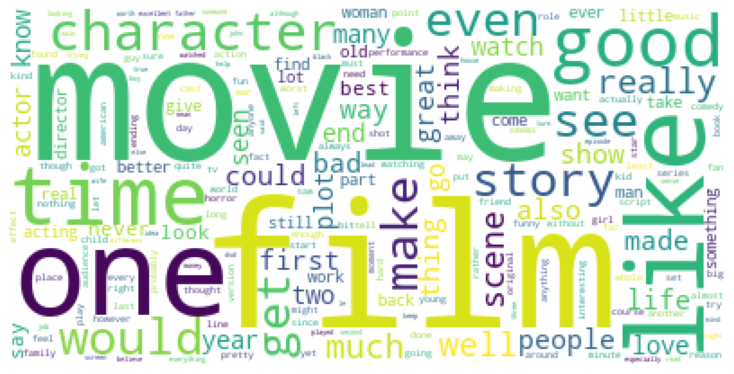

In [13]:
from wordcloud import WordCloud

vFreq  = np.sum(mBoW.toarray(), axis=0)
lWords = oBoW.get_feature_names()
Dict   = dict(zip(lWords, vFreq))

wordcloud = WordCloud(background_color='white').generate_from_frequencies(Dict) 

plt.figure      (figsize=(10, 8)) 
plt.imshow      (wordcloud) 
plt.axis        ("off") 
plt.tight_layout(pad=0) 
plt.show        () 

#### Simple plot of the words' frequencies:
* Note that rare words might be the important ones.

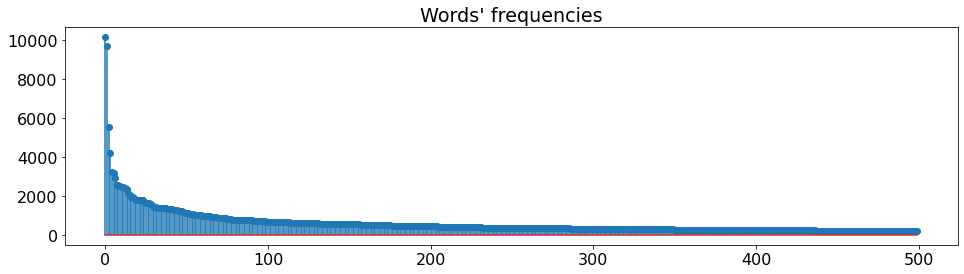

In [14]:
plt.figure(figsize=(16, 4))
plt.stem  (-np.sort(-vFreq)[:500])
plt.title ("Words' frequencies")
plt.show  ()

### Classification:

In [15]:
#-- Original data:
lDocs = dData['review'].values
vY    = dData['sentiment']

len(lDocs), vY.shape

(5000, (5000,))

#### Train a classifier using pipeline:

In [16]:
from sklearn.pipeline        import make_pipeline
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing   import FunctionTransformer

oPreprocess = FunctionTransformer(lambda lDocs: PreprocessDocs(lDocs))
oPipe       = make_pipeline(oPreprocess, oBoW, LogisticRegression(max_iter=200))
oKFold      = KFold(10, shuffle=True, random_state=0)
vHatY       = cross_val_predict(oPipe, lDocs, vY, cv=oKFold)

np.mean(vHatY == vY)

0.8482

### Exercise
Use TF-IDF and improve the BoW performance.

In [17]:
oPipe = ???
vHatY = cross_val_predict(oPipe, lDocs, vY, cv=oKFold)

np.mean(vHatY == vY)

SyntaxError: invalid syntax (Temp/ipykernel_7296/2044436254.py, line 1)

In [ ]:
# oPipe = make_pipeline(oPreprocess, oBoW, TfidfTransformer(), LogisticRegression(max_iter=200))